# CBE 60553, Fall 2017, Homework 5

Solve each problem on separate sheets of paper, and clearly indicate the problem number and your name on each. Carefully and neatly document your answers. You may use a mathematical solver like Python. Use plotting software for all plots.

## 1. Just a little unstable

The energy minimum/entropy maximum principle places bounds on the stability of fundamental equations. What are the limits of stability with respect to $T$ and $v$ of the following Helmholtz fundamental equations?

1. A monatomic ideal gas: <br>
$$ \begin{equation*} a_\text{ig} = \left \{ - RT ln (v) -1.5 R T ln (R T) \right\} +\left \{ RT \right \} \end{equation*} $$
<br>
2. A monatomic van der Waals gas: <br>
$$ \begin{equation*} a_\text{vdW} = \left \{ - RT ln (v-b) -1.5 R T ln (R T) \right\} +\left \{ RT -a/v \right \} \end{equation*} $$

$ \textbf{soln)}$

Criteria for evaluating stability.

$ \frac{\partial^2 a}{\partial \text{int}^2} \leq 0 \quad \text{and} \quad \frac{\partial^2 a}{\partial \text{ext}^2} \geq 0 $

$\text{1.}$

$\frac{\partial^{2}a_\text{ig}}{\partial T^{2}} = -1.5 \frac{R}{T} \leq 0 \quad $ since $T \geq 0$

and,

$\frac{\partial^{2}a_\text{ig}}{\partial v^{2}} = \frac{RT}{v} \geq 0 \quad $ since $T \geq 0$

Thus, it is stable.

$\text{2.}$

$\frac{\partial^{2}a_\text{vdW}}{\partial T^{2}} = -1.5 \frac{R}{T} \leq 0 \quad $ since $T \geq 0$

and,

$\frac{\partial^{2}a_\text{vdW}}{\partial v^{2}} = \frac{RT}{(b-v)^2} - \frac{2a}{v^{3}} $ can be less than or greater than $0$.

Thus, it is stable when $\frac{RT}{(b-v)^2} \geq \frac{2a}{v^{3}}$.


## 2. What passes for a law these days….

The van der Waals equation obeys the law of corresponding states, so all van der Waals fluids exhibit the same vapor-liquid phase equilibrium when presented in reduced variables.

1. Use the following relationship to derive an expression for the van der Waals equation in terms of the reduced variable. <br>
$v_R = v/v_c$, $T_R = T/T_c$, and $P_R = P/P_c$. <br>
$$\begin{equation*} \left ( \frac{∂ P}{∂ v} \right )_{T=T_c} = \left ( \frac{∂^2 P}{∂ v^2} \right )_{T=T_c} = 0 \end{equation*}$$
<br>
2. Plot the spinodal curve of a van der Waals fluid on a $P_R, v_R$ diagram.

$ \textbf{soln)}$

$ \text{1.} $

$ \left(\frac{\partial P}{\partial v}\right)_{T=T_c} = \frac{-RT_{c}}{(v-b)^2} + \frac{2a}{v^{3}} = 0 \rightarrow 2a(v-b)^{2} = RT_{c}v^{3} \quad (\text{eq. 1}) $
$ \left(\frac{\partial^{2} P}{\partial v^{2}}\right)_{T=T_c} = \frac{2RT_{c}}{(v-b)^3} - \frac{6a}{v^{4}} = 0 \rightarrow 6a(v-b)^{3} = 2RT_{c}v^{4}  \quad (\text{eq. 2})$ 

$ \frac{\text{eq. 1}}{\text{eq. 2}} \rightarrow \frac{1}{3(v-b)} = \frac{1}{2v}$  

$\therefore ~v = 3b $

Plug $v = 3b$ into $(\text{eq.1})$

$ 2a(3b-b)^{2} = RT_{c}(3b)^{3} \rightarrow T_c = \frac{8a}{27Rb}$

Plug $v = 3b$ and $T_{c} = \frac{8a}{27Rb}$ into vdW equation.

$ P = \frac{\frac{8a}{27Rb}}{3b-b} - \frac{a}{(3b)^2} = \frac{a}{27b^2} $

Thus, 

$v_c = 3b, \quad T_c = \frac{8a}{27Rb},  \quad P_c = \frac{a}{27b^2}  $

So, the reduced vdW equation is

$ P_{r}P_{c} = \frac{RT_{r}T_{c}}{v_{r}v_{c} - b} - \frac{a}{v_{r}^2 v_{c}^2} $

$ P_{r}\frac{a}{27b^2} = \frac{RT_{r}\frac{8a}{27Rb}}{v_{r}(3b) - b} - \frac{a}{v_{r}^2 (3b)^2}$

$ \therefore ~ P_r = \frac{8T_r}{3v_r - 1} - \frac{3}{v_r^2} \quad (\text{eq. 3})$

$ \text{2.} $

For the spinodal curve,

$ \left(\frac{\partial P_r}{\partial v_r}\right)_{T_c} = 0 $

$ \rightarrow \frac{-24 T_r}{(3v_r - 1)^2} + \frac{6}{v_r^3} = 0 $

rearrange the above equation

$ 8T_r = \frac{2}{v_r^3} (3v_r - 1)^2 \quad (\text{eq. 4}) $

From (eq. 3) and (eq. 4)

$ P_{r,spinodal} = \frac{6v_r - 2}{v_r^3} - \frac{3}{v_r^2} $

See plot below

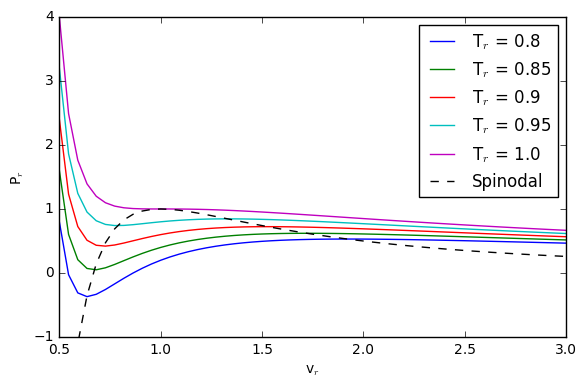

In [9]:
from scipy.optimize import fsolve
import numpy as np 
import matplotlib.pyplot as plt

vr = np.linspace(0.5, 5, 100)

# plot vdW isotherm
for Tr in [0.8, 0.85, 0.9, 0.95, 1.]:
    Pr = 8 * Tr / (3 * vr - 1) - 3 / vr ** 2
    plt.plot(vr, Pr, label = 'T$_r$ = {0}'.format(Tr))
    
# plot spinodal curve
Prspin = (6 * vr - 2) / vr ** 3 - 3 / vr ** 2
plt.plot(vr, Prspin, 'k--', label = 'Spinodal')

# Some formatting
plt.xlim(xmax=3)
plt.ylim(ymin=-1)
plt.legend()
plt.xlabel('v$_r$')
plt.ylabel('P$_r$')
plt.tight_layout()
plt.show()

## 3. The two phases of van der Waals

Binodal curves are much trickier to find because they are determined by the equality of the three intensive variables rather than just by the curvature of the free energy. The “equal area construction” is a common numerical approach to finding the binodal points.

1. Use an equal area construction to compute the reduced saturation pressure and reduced vapor and liquid volumes at $T_r = 0.8, 0.85, 0.90, 0.95, 1$. You will want to use a numerical solver.
2. Plot the points on the same $P_R, v_R$ diagram as the spinodal above.
3. (Bonus!) Find the latent entropy and latent enthalpy at $T_r = 0.8, 0.85, 0.90, 0.95, 1$, using the fact that: <p> $$\begin{equation*} \Delta s = \int_{v_l}^{v_g} \left ( \frac{∂s}{∂v} \right )_T dv \end{equation*} $$ <br>
Comment on any trend you find. $\textit{Hint:}$ You’ll want to apply a Maxwell relation and a cyclic permutation to the partial derivative before evaluating.
4. (Bonus!) The van der Waals constants of $\text{H}_{2}\text{O}$ are $a = 0.5609~\text{Pa m}^6\text{mol}^{-2}$ and $b = 30.49×10-6~\text{m}^3\text{mol}^{-1}$. Use your results to estimate $Δ H^\text{vap}$ of $\text{H}_{2}\text{O}$ at $1~\text{atm}$. How does the result compare to the experimental value of $ 40.64~\text{kJ/mol}$?

$ \textbf{soln)}$

$ \text{1 and 2.} $

From the equal area construction we have the following three equations,

$ \text{(1) }  P_r = \frac{8T_r}{3v_l - 1} - \frac{3}{v_l^2} $

$ \text{(2) }  P_r = \frac{8T_r}{3v_g - 1} - \frac{3}{v_g^2} $

$ \text{(3) }  P_r(v_g - v_l) = \frac{8T_r}{3} ln\left(\frac{3v_g - 1}{3v_l-1}\right) + \frac{3}{v_g} - \frac{3}{v_l}$

Now we can solve these three equations using fsolve in scipy. <br>
see code below.

$ \text{3.} $

We have,

$ \Delta s = \int_{v_l}^{v_g} \left ( \frac{∂s}{∂v} \right )_T dv $

Using Maxwell's relations,

$ \left(\frac{\partial s}{\partial v}\right)_{T} = \left(\frac{\partial P}{\partial T}\right)_{v} \rightarrow \left(\frac{\partial P_r}{\partial T_r}\right)_{v_r} = \frac{8}{3v_r - 1} $

Now, 

$ \frac{P_c}{T_c} \left(\frac{\partial P_r}{\partial T_r} \right)_{v_r} = \left(\frac{\partial P}{\partial T} \right)_{v} $

$ \therefore~ \Delta s = \frac{P_c v_c}{T_c} \int_{v_l}^{v_g} \left(\frac{\partial P_r}{\partial T_r} \right)_{v_r} dv_r = \frac{P_c v_c}{T_c} \int_{v_l}^{v_g} \left( \frac{8}{3v_r - 1} \right) dv_r = R ln\left(\frac{3v_g - 1}{3v_c - 1} \right) $

$ \therefore~ \Delta h = T \Delta s = RTln\left(\frac{3v_g - 1}{3v_c - 1} \right) $

see code below as well..

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

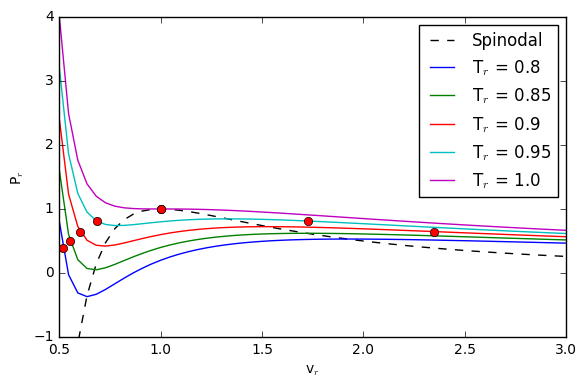

Binodal points and the spinodal curve are denoted by red circles and black dashed line.

We see that both latent entropy and latent enthalpy decrease with increasing Tr.

In [60]:
from scipy.optimize import fsolve
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

def eqns2solve(x, Tr):
    Pr, vl, vg = x
    f1 = Pr - 8. * Tr / (3. * vl - 1) + 3. / vl ** 2 
    f2 = Pr - 8. * Tr / (3. * vg - 1) + 3. / vg ** 2
    f3 = Pr * (vg - vl) - (8 * Tr * np.log((3 * vg - 1) / (3 * vl - 1)) / 3. + 3. / vg - 3. / vl)
    return (f1, f2, f3)
display(Latex('T$_{r}$ $\hspace{16.5pt}$ P$_{r}^{sat}$ $\hspace{16.5pt}$ v$_{l}$ $\hspace{21.5pt}$ v$_{g}$ $\hspace{19.5pt}$ s/R $\hspace{16.5pt}$ h/R/T$_{c}$')) # Table header

vr = np.linspace(0.5, 5, 100)
    
# plot spinodal curve
Prspin = (6 * vr - 2) / vr ** 3 - 3 / vr ** 2
plt.plot(vr, Prspin, 'k--', label = 'Spinodal')

for Tr in [0.8, 0.85, 0.9, 0.95, 1.]:
    Prs, vl, vg = fsolve(eqns2solve, (0.4, 0.5, 3.), Tr)
    
    # plot vdW isotherm
    Pr = 8 * Tr / (3 * vr - 1) - 3 / vr ** 2
    plt.plot(vr, Pr, label = 'T$_r$ = {0}'.format(Tr))
    plt.plot(vg, Prs, 'ro')
    plt.plot(vl, Prs, 'ro')
    
    # Get enthalpy and entropy
    s_R = np.log((3 * vg - 1) / (3 * vl - 1))
    h_R_Tc = Tr * s_R
    display(Latex('{0:1.2f} $\quad$ {1:1.3f} $\quad$ {2:1.3f} $\quad$ {3:1.3f} $\quad$ {4:1.3f} $\quad$ {5:1.3f}'.format(Tr, Prs, vl, vg, s_R, h_R_Tc)))

# Some formatting
plt.xlim(xmax=3)
plt.ylim(ymin=-1)
plt.legend()
plt.xlabel('v$_r$')
plt.ylabel('P$_r$')
plt.tight_layout()
plt.show()

display(Markdown('Binodal points and the spinodal curve are denoted by red circles and black dashed line.'))
display(Markdown('We see that both latent entropy and latent enthalpy decrease with increasing Tr.'))

$ \text{4.} $

In [105]:
from scipy.optimize import fsolve
import numpy as np 
from IPython.display import display, Markdown, Latex

# Parameters in SI units
a = 0.5609
b = 30.49e-6
P = 101325
R = 8.314

Pc = 1 / 27. * a / b ** 2
Tc = 8. * a / 27. / R / b
vc = 3. * b

Pr = P / Pc

# Now we have to solve for Tr, vl and vg
def eqns2solve(x, Pr):
    Tr, vl, vg = x
    f1 = Pr - 8. * Tr / (3. * vl - 1) + 3. / vl ** 2 
    f2 = Pr - 8. * Tr / (3. * vg - 1) + 3. / vg ** 2
    f3 = Pr * (vg - vl) - (8 * Tr * np.log((3 * vg - 1) / (3 * vl - 1)) / 3. + 3. / vg - 3. / vl)
    return (f1, f2, f3)

Tr, vl, vg = fsolve(eqns2solve, (0.5, 0.4, 20), Pr)
Hvap = Tc * Tr * R * np.log((3 * vg - 1) / (3 * vl - 1))

display(Latex('$\Delta H_{{vap}}$ = {0:1.3f} J, $T_{{r}}$ = {1:1.3f}, $v_{{l}}$ = {2:1.3f} and $v_{{g}}$ = {3:1.3f}.'.format(Hvap, Tr, vl, vg)))
display(Latex('It looks like the van der Waals EOS underestimates $\Delta H_{vap}$.'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 4. Steam at the top of the mountain

The Clapeyron equation, and its cousin Clausius-Clapeyron, relate observable pressure and temperature
at a phase boundary to the underlying latent quantities.

1. Determine the value of $dT/dP$ for water at its normal boiling point ($1~ \text{atm}$) of $373.1~\text{K}$ given that $(\Delta H^\text{vap}(373.1~\text{K})= 40.65~\text{kJ/mol}$ and the densities of liquid and vapor are $0.9584$ and $0.6010 \times 10^{-3}~\text{g mL}^{-1}$, respectively. Estimate the boiling point of water at $2~\text{atm}$.
2. A liquid boils at $95~^{\circ}\text{C}$ at the top of a hill and at $105~^{\circ}\text{C}$ at the bottom. It’s latent heat of vaporization is $ 1000.0~\text{cal/mol}$. What is the height of the hill? Hint: How does pressure vary with altitude?



$ \textbf{soln)}$

$ \text{1.} $

We have, 

$ \frac{dP}{dT} = \frac{\Delta h}{T \Delta v} \rightarrow \frac{dT}{dP} = \frac{T \Delta v}{\Delta h} $

given, $ \Delta H^{vap} = 40.65~\text{kJ/mol} $

$ \Delta v = v_g - v_l = 18~\text{g/mol} \left(\frac{1}{0.6010 \times 10^{-3}} - \frac{1}{0.9584 \times 10^{-3}} \right) \text{cm}^3 / \text{g} = 0.0299~ \text{m}^3 / mol $

Plug in the volumes,

$ \frac{dT}{dP} = 2.75 \times 10^{-4}~\text{K/Pa} $

Now, using the Clausius-Clapeyron equation,

$ ln\left(\frac{P_2}{P_1}\right) = \frac{\Delta H}{R} \left(\frac{1}{T_1} - \frac{1}{T_2} \right) $

which give us,

$T_2 = 394~\text{K} $ as the boiling point of water at 2 atm.

$ \text{2.} $

From the Clausius-Clapeyron equation,

$ ln\left(\frac{P_2}{P_1}\right) = \frac{4184}{8.314} \left(\frac{1}{378} - \frac{1}{368} \right) \quad (1000~\text{cal} = 4184~\text{J}) $

$ \rightarrow P_2 = 0.959~\text{atm} $

$ \therefore ~P = \rho g \Delta h \quad \text{where} \quad \rho = 1.225~\text{kg/m}^3 $

$ \rightarrow \Delta h = 295~\text{m} $




## 5. Qualitatively in phase

The triple point of oxygen ($\text{O}_2$) is at $54.3~\text{K}$ and $1.14~\text{torr}$; it’s critical point is at $154.6~\text{K}$ and $37828~\text{torr}$; it’s normal melting and boiling points are $-218.4~^{\circ}\text{C}$ and $-182.9~ ^{\circ}\text{C}$, respectively. Sketch the phase diagram of oxygen. Does it melt under applied pressure in the same way that water does?

$ \textbf{soln)}$

Under const. T oxygen will not melt with increasing pressure.

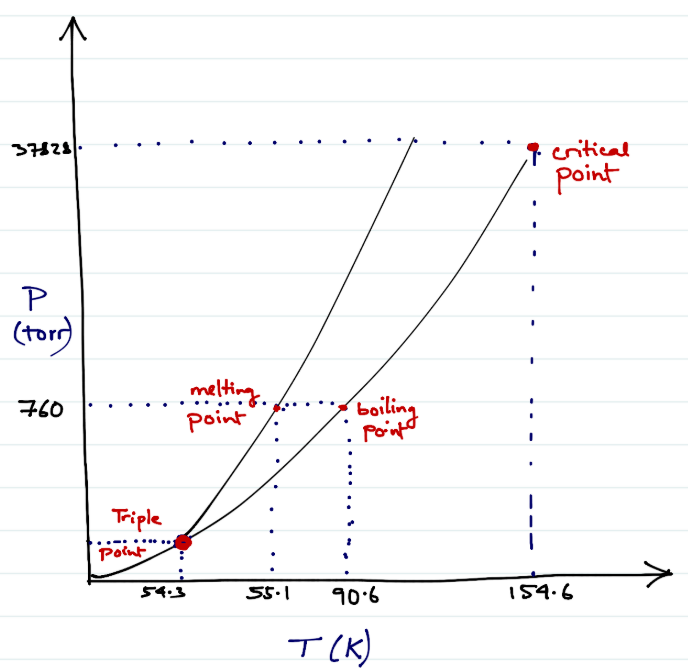

In [110]:
from IPython.display import Image
Image(filename = 'HW-5-prob5-PT.png', width=500)

## 6. Quantitatively in phase

Near the triple point the following equations describe the vapor pressure of liquid and solid $\text{NH}_3$: <p>
$$ ln P^\text{sat}(l) = 24.38~\text{Pa} - \frac{3063~\text{Pa K}}{T} \quad \text{and} \quad ln P^\text{sat}(s) = 27.92~\text{Pa} - \frac{3754~\text{Pa K}}{T}$$

1. What are the temperature and pressure at the triple point?
2. What is the latent heat of vaporization?
3. What is the latent heat of sublimation?
4. What is the latent heat of fusion at the triple point?

$ \textbf{soln)}$

$ \text{1.} $

At triple point,

$ P^{sat}(l) = P^{sat}(s) $

$ 24.38 - \frac{3063}{T} = 27.92 - \frac{3754}{T} $

$ \therefore ~T_{TP} = 195.198~\text{K} $

Plug $T_{TP}$ into the given equation,

$ P_{TP} = exp \left(24.38 - \frac{3063}{195.2} \right) = 5932.74~\text{Pa}$


$ \text{2.} $

$\frac{dP}{dT} = \frac{\Delta H}{T \Delta v} \rightarrow P \frac{dlnP}{dT} = \frac{\Delta H}{T \Delta v} \rightarrow \Delta H = PT \Delta v \frac{dlnP}{dT} $

$ \Delta H^{vap} = PT(v^{g} - v^{l}) \frac{3063}{T^2} \approx \frac{P}{T} v^{g} \cdot 3063 \quad (\because~v^{g} \gg v^{l})$

Assume ideal gas, $Pv/T = R $

$ \Delta H^{vap} = R \cdot 3063~\text{K} = 25465.8~\text{J/mol} $


$ \text{3.} $

$ \Delta H^{sub} = PT(v^{g} - v^{s}) \frac{3754}{T^2} \approx \frac{P}{T} v^{g} \cdot 3754 \quad (\because~v^{g} \ggg v^{s})$

Assume ideal gas, $Pv/T = R $

$ \Delta H^{sub} = R \cdot 3754~\text{K} = 31210.8~\text{J/mol} $


$ \text{4.} $

$ \Delta H^{fus} = \Delta H^{sub} - \Delta H^{vap} = 31210.8~\text{J/mol} - 25465.8~\text{J/mol} = 5745.0~\text{J/mol} $

## 7. Are you sure? How sure?

The two state model allows a simple illustration of the principles of the microcanonical ensemble. A closed system is composed of an even number of two-state “atoms,” each of which can have energy 0 or $ε$. The system is partitioned into two subsystems of equal size.

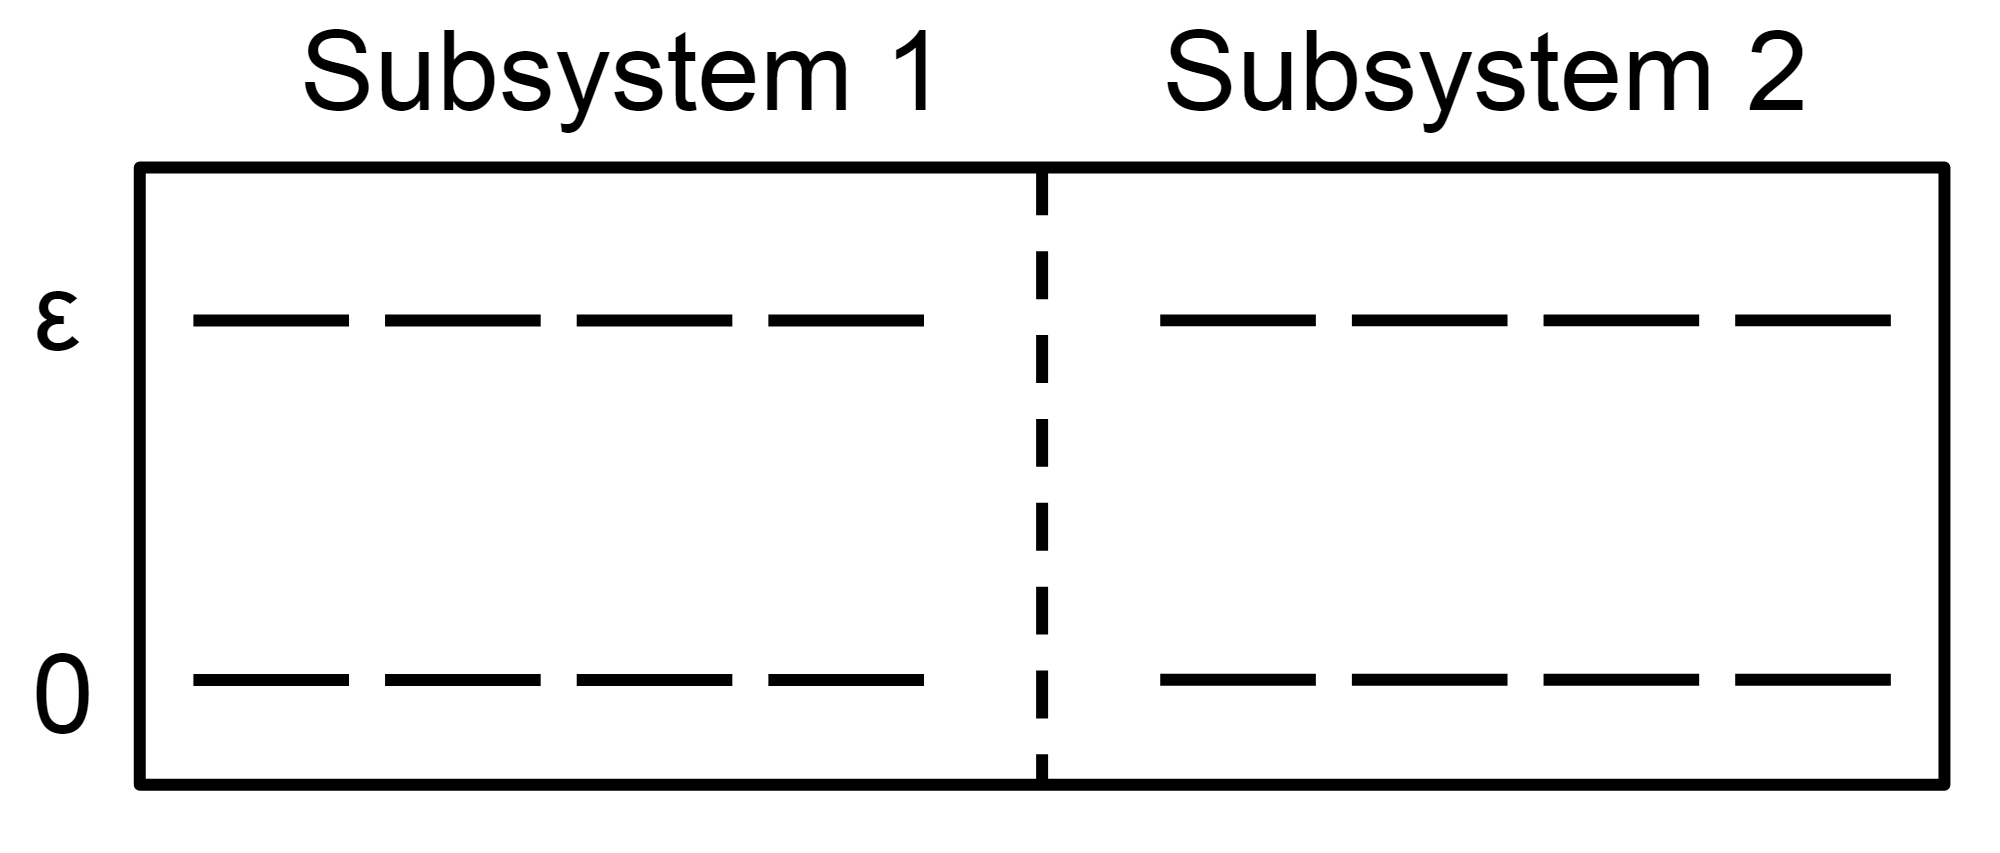

In [107]:
from IPython.display import Image
Image(filename = 'HW-5-prob7-Two-state.png', width=400)

1. Suppose the system contains 8 atoms as in the figure above, and the total energy of the system is $U = 4ε$. Determine the possible energies $U_1$ of subsystem 1 and their relative probabilities.
2. What fundamental assumption did you make to assess the probabilities?
3. The probability distribution you just calculated is called binomial (specifically, binomial with individual probability $p=1/2$). As the sizes of the subsystems $N_i$ and the total energy $U$ grow proportionately, the probability distribution on $U_1$ becomes approximately Gaussian with mean $(1/2) N_1ε$ and variance $σ^2 = N_1ε^2$.<br>
a. Calculate the ratio of the probability that $U_1=0.51 U$ to $U_1=0.5 U$ for $N_1 = 100$.  <br>
b. Calculate the ratio of the probability that $U_1=0.51 U$ to $U_1=0.5 U$ for $N_1 = 10^6$. <br>
c. Calculate the ratio of the probability that $U_1=0.51 U$ to $U_1=0.5 U$ for $N_1 = 10^{20}$.

4. What do you think? As $N_1$ gets really big, what wil $U_1$ be? How certain are you?

$ \textbf{soln)}$

$ \text{1.} $

We have, for the whole system,

$ \Omega_{tot} = \frac{8!}{4! 4!} = 70 $

Now, $U_1$ can be $ 0, \epsilon, 2\epsilon, 3\epsilon ~\text{or}~ 4\epsilon $ 

$ U_1 = 0 \quad \binom{4}{0} \cdot \binom{4}{4} = 1 \quad \rightarrow P = 1/70 $

$ U_1 = \epsilon \quad \binom{4}{1} \cdot \binom{4}{3} = 16 \quad \rightarrow P = 16/70 $

$ U_1 = 2\epsilon \quad \binom{4}{2} \cdot \binom{4}{2} = 36 \quad \rightarrow P = 36/70 $

$ U_1 = 3\epsilon \quad \binom{4}{3} \cdot \binom{4}{1} = 16 \quad \rightarrow P = 16/70 $

$ U_1 = 4\epsilon \quad \binom{4}{0} \cdot \binom{4}{4} = 1 \quad \rightarrow P = 1/70 $


$ \text{2.} $

We assume that the two systems are identical and that the probabilities of being in state 1 and state 2 are equal.


$ \text{3.} $

For a gaussian distribution,

$ P = \frac{1}{\sigma \sqrt{2\pi}} exp\left(\frac{-(U_1 - \mu)^2}{2 \sigma^2}\right) $

$ \frac{P_{U_1 = 0.51U}}{P_{U_1 = 0.5U}} = exp\left (\frac{-\left(x_{1} - \frac{N_{1}\epsilon}{2}\right)^2}{2 N_{1}\epsilon^2} + \frac{\left(x_{2} - \frac{N_{1}\epsilon}{2}\right)^2}{2 N_{1}\epsilon^2} \right) $

where, $x_{1} = 0.51 N_{1} \epsilon \quad $ and $ \quad x_{2} = 0.50 N_{1} \epsilon $


$ \hspace{5pt} \text{a. } \text{for}~N = 100, $

$ \hspace{10pt} \frac{P_{U_1 = 0.51U}}{P_{U_1 = 0.5U}} = 0.9950 $

$ \hspace{5pt} \text{b. } \text{for}~N = 10^{6}, $

$ \hspace{10pt} \frac{P_{U_1 = 0.51U}}{P_{U_1 = 0.5U}} = 1.9287 \times 10^{-22} $

$ \hspace{5pt} \text{c. } \text{for}~N = 10^{20}, $

$ \hspace{10pt} \frac{P_{U_1 = 0.51U}}{P_{U_1 = 0.5U}} \approx 0 $


$ \text{4.} $

$ U_1 = 0.5U $ at very large N. Variance of the mean $\propto 1/N$

